# Chapter 11

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [482]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [483]:

import numpy as np
import pandas as pd

import thinkstats2
import thinkplot

## Multiple regression

Let's load up the NSFG data again.

In [484]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [485]:
import first

live, firsts, others = first.MakeFrames()

Here's birth weight as a function of mother's age (which we saw in the previous chapter).

In [486]:
import statsmodels.formula.api as smf

formula = 'totalwgt_lb ~ agepreg'
model = smf.ols(formula, data=live)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     43.02
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           5.72e-11
Time:                        20:20:42   Log-Likelihood:                -15897.
No. Observations:                9038   AIC:                         3.180e+04
Df Residuals:                    9036   BIC:                         3.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8304      0.068    100.470      0.000       6.697       6.964
agepreg        0.0175      0.003      6.559      0.000       0.012       0.023
==============================================================================
Omnibus:                     1024.052   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3081.833
Skew:                          -0.601   Prob(JB):                         0.00
Kurtosis:                       5.596   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can extract the parameters.

In [487]:
inter = results.params['Intercept']
slope = results.params['agepreg']
inter, slope

(6.830396973311048, 0.017453851471802843)

And the p-value of the slope estimate.

In [488]:
slope_pvalue = results.pvalues['agepreg']
slope_pvalue

5.7229471073134105e-11

And the coefficient of determination.

In [489]:
results.rsquared

0.004738115474710369

The difference in birth weight between first babies and others.

In [490]:
diff_weight = firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()
diff_weight

-0.12476118453549034

The difference in age between mothers of first babies and others.

In [491]:
diff_age = firsts.agepreg.mean() - others.agepreg.mean()
diff_age

-3.5864347661500275

The age difference plausibly explains about half of the difference in weight.

In [492]:
slope * diff_age

-0.06259709972169254

Running a single regression with a categorical variable, `isfirst`:

In [493]:
live['isfirst'] = live.birthord == 1
formula = 'totalwgt_lb ~ isfirst'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     17.74
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           2.55e-05
Time:                        20:20:43   Log-Likelihood:                -15909.
No. Observations:                9038   AIC:                         3.182e+04
Df Residuals:                    9036   BIC:                         3.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.3259      0.021    356.007      0.000       7.286       7.366
isfirst[T.True]    -0.1248      0.030     -4.212      0.000      -0.183      -0.067
==============================================================================
Omnibus:                      988.919   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2897.107
Skew:                          -0.589   Prob(JB):                         0.00
Kurtosis:                       5.511   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now finally running a multiple regression:

In [494]:
formula = 'totalwgt_lb ~ isfirst + agepreg'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     24.02
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           3.95e-11
Time:                        20:20:43   Log-Likelihood:                -15894.
No. Observations:                9038   AIC:                         3.179e+04
Df Residuals:                    9035   BIC:                         3.182e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.9142      0.078     89.073      0.000       6.762       7.066
isfirst[T.True]    -0.0698      0.031     -2.236      0.025      -0.131      -0.009
agepreg             0.0154      0.003      5.499      0.000       0.010       0.021
==============================================================================
Omnibus:                     1019.945   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3063.682
Skew:                          -0.599   Prob(JB):                         0.00
Kurtosis:                       5.588   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected, when we control for mother's age, the apparent difference due to `isfirst` is cut in half.

If we add age squared, we can control for a quadratic relationship between age and weight.

In [495]:
live['agepreg2'] = live.agepreg**2
live['agepreg4'] = live.agepreg**4
formula = 'totalwgt_lb ~  agepreg + agepreg2'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     32.67
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           7.30e-15
Time:                        20:20:43   Log-Likelihood:                -15886.
No. Observations:                9038   AIC:                         3.178e+04
Df Residuals:                    9035   BIC:                         3.180e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5720      0.275     20.226      0.000       5.032       6.112
agepreg        0.1186      0.022      5.485      0.000       0.076       0.161
agepreg2      -0.0019      0.000     -4.714      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1009.326   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3012.686
Skew:                          -0.595   Prob(JB):                         0.00
Kurtosis:                       5.566   Cond. No.                     1.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [496]:
print(sum(live["agepreg2"]))
print(sum(live["agepreg"])**2/len(live["agepreg"]))
x1square=sum(live["agepreg2"])-sum(live["agepreg"])**2/len(live["agepreg"])
print("x1square",x1square)

print(sum(live["agepreg4"]))
print(sum(live["agepreg2"])**2/len(live["agepreg2"]))
x2square=sum(live["agepreg4"])-sum(live["agepreg2"])**2/len(live["agepreg2"])
print("x2square",x2square)

print((live["totalwgt_lb"]*live["agepreg"]).sum())
print((live["totalwgt_lb"]).sum()*(live["agepreg"]).sum()/len(live["agepreg"]) )
x1y=np.multiply(live["totalwgt_lb"],live["agepreg"]).sum()-(live["totalwgt_lb"]).sum()*(live["agepreg"]).sum()/len(live["agepreg"]) 
print("x1y", x1y)

print(np.multiply(live["totalwgt_lb"],live["agepreg2"]).sum())
print((live["totalwgt_lb"]).sum()*sum(live["agepreg2"])/len(live["agepreg2"]) )
x2y=np.multiply(live["totalwgt_lb"],live["agepreg2"]).sum()-((live["totalwgt_lb"]).sum()*sum(live["agepreg2"])/len(live["agepreg2"]) )
print("x2y", x2y)

print(np.multiply(live["agepreg2"],live["agepreg"]).sum())
print((live["agepreg2"]).sum()*sum(live["agepreg"])/len(live["agepreg"]) )
x1x2=np.multiply(live["agepreg2"],live["agepreg"]).sum()-(live["agepreg2"]).sum()*sum(live["agepreg"])/len(live["agepreg"]) 
print("x1x2", x1x2)


5973951.353499994
5690431.613559
x1square 283519.7399409935
4686600776.926258
3901190945.997421
x2square 785409830.9288373
1642339.9925
1637778.059666867
x1y 4561.932833133033
43089140.84665
42882594.01425948
x2y 206546.832390517
163803584.482093
148994833.0971041
x1x2 14808751.384988904


In [497]:
b1=((x2square*x1y)-(x1x2*x2y))/((x1square*x2square)-(x1x2**2))
print(b1)
b2=((x1square*x2y)-(x1x2*x1y))/((x1square*x2square)-(x1x2**2))
print(b2)
incerbb=live["totalwgt_lb"].mean()-b1*live["agepreg"].mean()-b2*live["agepreg2"].mean()
print(incerbb)

0.15511089207566042
-0.002661606365417637
5.135164704462163


In [498]:
dfss=live[['totalwgt_lb','agepreg', 'agepreg2']].dropna()
y = dfss['totalwgt_lb']
X = dfss[['agepreg', 'agepreg2']]

In [499]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,)

In [500]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
print(y_train.info())
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)
print("incerp .\n", lm.intercept_)

<class 'pandas.core.series.Series'>
Int64Index: 4519 entries, 9828 to 4140
Series name: totalwgt_lb
Non-Null Count  Dtype  
--------------  -----  
4519 non-null   float64
dtypes: float64(1)
memory usage: 70.6 KB
None
Coefficients: 
 [ 0.13026527 -0.0021257 ]
incerp .
 5.422995283715919


In [501]:
print((live["totalwgt_lb"]*live["agepreg"]))
print(live["agepreg"])

0        292.222500
1        309.093750
2        130.761250
3        124.810000
4        113.416875
            ...    
13581    195.457500
13584    171.551250
13588    110.818125
13591    161.850000
13592    161.850000
Length: 9148, dtype: float64
0        33.16
1        39.25
2        14.33
3        17.83
4        18.33
         ...  
13581    30.66
13584    26.91
13588    17.91
13591    21.58
13592    21.58
Name: agepreg, Length: 9148, dtype: float64


In [502]:
live["totalwgt_lb"].sum()

65666.75

In [503]:
slope=(0.538395)/np.var(live["agepreg"])
slope2=(25.615139)/np.var(live["agepreg2"])
print(slope, slope2)

0.017371762054484888 0.00029835034187804883


In [504]:
pd.DataFrame.cov(live[["totalwgt_lb","agepreg"]])
pd.DataFrame.cov(live[["totalwgt_lb","agepreg2"]])

,totalwgt_lb,agepreg2
totalwgt_lb,1.983290,25.615139
agepreg2,25.615139,85865.292547


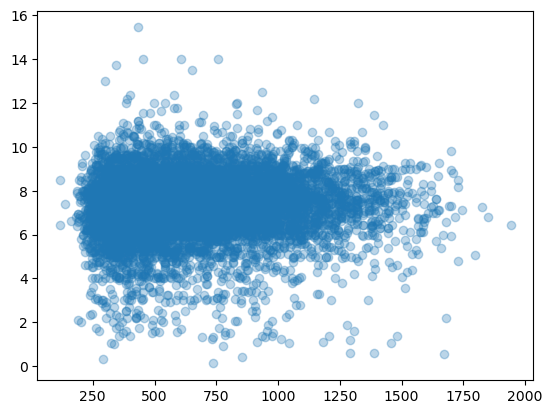

In [505]:
import matplotlib.pyplot as plt
plt.scatter(live['agepreg2'],live["totalwgt_lb"], alpha = 0.3)

When we do that, the apparent effect of `isfirst` gets even smaller, and is no longer statistically significant.

These results suggest that the apparent difference in weight between first babies and others might be explained by difference in mothers' ages, at least in part.

## Data Mining

We can use `join` to combine variables from the preganancy and respondent tables.

In [506]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [507]:
import nsfg

live = live[live.prglngth>30]
resp = nsfg.ReadFemResp()
resp.index = resp.caseid
join = live.join(resp, on='caseid', rsuffix='_r')
join.shape

(8884, 3334)

And we can search for variables with explanatory power.

Because we don't clean most of the variables, we are probably missing some good ones.

In [508]:
import patsy

def GoMining(df):
    """Searches for variables that predict birth weight.

    df: DataFrame of pregnancy records

    returns: list of (rsquared, variable name) pairs
    """
    variables = []
    for name in df.columns:
        try:
            if df[name].var() < 1e-7:
                continue

            formula = 'totalwgt_lb ~ agepreg + ' + name
            model = smf.ols(formula, data=df)
            if model.nobs < len(df)/2:
                continue

            results = model.fit()
        except (ValueError, TypeError, patsy.PatsyError) as e:
            continue
        
        variables.append((results.rsquared, name))

    return variables

In [509]:
variables = GoMining(join)


In [510]:
sorted(variables, reverse=True)
joinxx=join[join["babysex"]==1]

In [511]:
rofl= pd.concat([join,joinxx])
rofl.reset_index(inplace=True)

C:\Users\rik\AppData\Local\Temp\ipykernel_6024\2840263015.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rofl.reset_index(inplace=True)


In [512]:
print(rofl)

       index  caseid  pregordr  howpreg_n  howpreg_p  moscurrp  nowprgdk  \
0          0       1         1        NaN        NaN       NaN       NaN   
1          1       1         2        NaN        NaN       NaN       NaN   
2          2       2         1        NaN        NaN       NaN       NaN   
3          3       2         2        NaN        NaN       NaN       NaN   
4          4       2         3        NaN        NaN       NaN       NaN   
...      ...     ...       ...        ...        ...       ...       ...   
13392  13579   12566         2        NaN        NaN       NaN       NaN   
13393  13581   12568         2        NaN        NaN       NaN       NaN   
13394  13588   12571         1        NaN        NaN       NaN       NaN   
13395  13591   12571         4        NaN        NaN       NaN       NaN   
13396  13592   12571         5        NaN        NaN       NaN       NaN   

       pregend1  pregend2  nbrnaliv  ...  pubassis_i_r    basewgt_r  \
0           6.0 

C:\Users\rik\AppData\Local\Temp\ipykernel_6024\931843201.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=join, x= join["totalwgt_lb"], hue=join["babysex"] , element="step", palette=sns.color_palette("pastel"), bins =30, kde=True)


<AxesSubplot: xlabel='totalwgt_lb', ylabel='Count'>

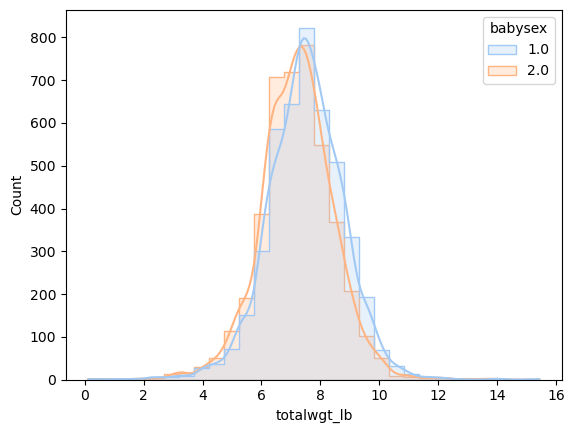

In [513]:
import seaborn as sns
#this doesnt take in effect the density.
#look further examples below to dramaturgize what can happe
sns.histplot(data=join, x= join["totalwgt_lb"], hue=join["babysex"] , element="step", palette=sns.color_palette("pastel"), bins =30, kde=True)
#sns.kdeplot(data=join, x= join["totalwgt_lb"], hue=join["babysex"] , palette=sns.color_palette("pastel"))

C:\Users\rik\AppData\Local\Temp\ipykernel_6024\4139902840.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=rofl, x= rofl["totalwgt_lb"], hue=rofl["babysex"] , element="step", palette=sns.color_palette("pastel"), bins =30, kde=True)
C:\Users\rik\AppData\Local\Temp\ipykernel_6024\4139902840.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(data=rofl, x= rofl["totalwgt_lb"], hue=rofl["babysex"] , palette=sns.color_palette("pastel"))


<AxesSubplot: xlabel='totalwgt_lb', ylabel='Count'>

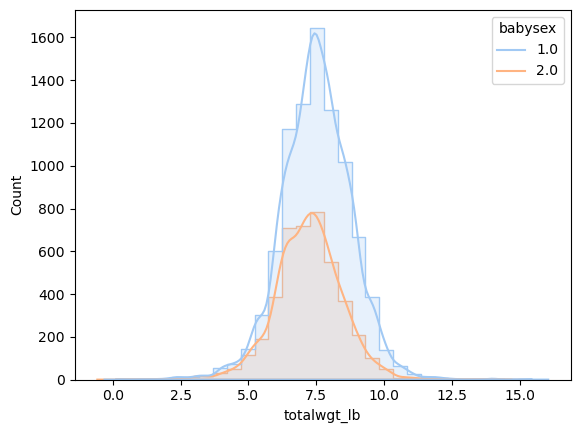

In [514]:
sns.histplot(data=rofl, x= rofl["totalwgt_lb"], hue=rofl["babysex"] , element="step", palette=sns.color_palette("pastel"), bins =30, kde=True)
sns.kdeplot(data=rofl, x= rofl["totalwgt_lb"], hue=rofl["babysex"] , palette=sns.color_palette("pastel"))

In [516]:
rofl["normalizer"]=np.NAN
rofl["normalizer"].loc[rofl["babysex"]==2]=rofl["totalwgt_lb"][rofl["babysex"]==1]/len(rofl[rofl["babysex"]==1])
rofl["normalizer"].loc[rofl["babysex"]==2]=rofl["totalwgt_lb"][rofl["babysex"]==2]/len(rofl[rofl["babysex"]==2])

C:\Users\rik\AppData\Local\Temp\ipykernel_6024\2801590652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rofl["normalizer"].loc[rofl["babysex"]==2]=rofl["totalwgt_lb"][rofl["babysex"]==1]/len(rofl[rofl["babysex"]==1])
C:\Users\rik\AppData\Local\Temp\ipykernel_6024\2801590652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rofl["normalizer"].loc[rofl["babysex"]==2]=rofl["totalwgt_lb"][rofl["babysex"]==2]/len(rofl[rofl["babysex"]==2])


C:\Users\rik\AppData\Local\Temp\ipykernel_6024\959532735.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=rofl, x= rofl["totalwgt_lb"],hue="babysex", element="step", palette=sns.color_palette("pastel"), bins =30, kde=True, stat = "density", discrete = False )


<AxesSubplot: xlabel='totalwgt_lb', ylabel='Density'>

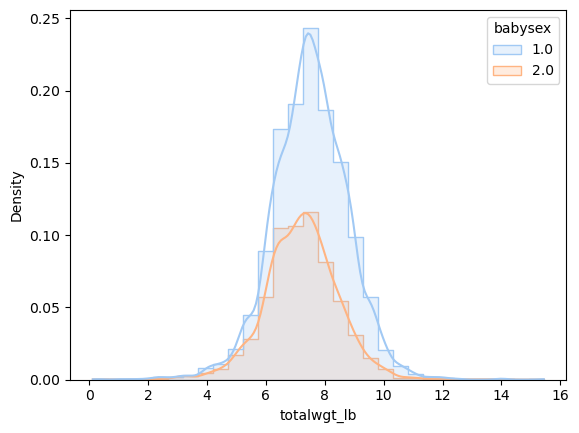

In [ ]:
sns.histplot(data=rofl, x= rofl["totalwgt_lb"],hue="babysex", element="step", palette=sns.color_palette("pastel"), bins =30, kde=True, stat = "density", discrete = False )


C:\Users\rik\AppData\Local\Temp\ipykernel_6024\3360683518.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=rofl, x= rofl["totalwgt_lb"][rofl["babysex"]==1], element="step", palette=sns.color_palette("pastel"), bins =30, kde=True, stat = "density", discrete = False )
C:\Users\rik\AppData\Local\Temp\ipykernel_6024\3360683518.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=rofl, x= rofl["totalwgt_lb"][rofl["babysex"]==2], element="step", palette=sns.color_palette("pastel"), bins =30, kde=True, stat = "density", discrete = False )


<AxesSubplot: xlabel='totalwgt_lb', ylabel='Density'>

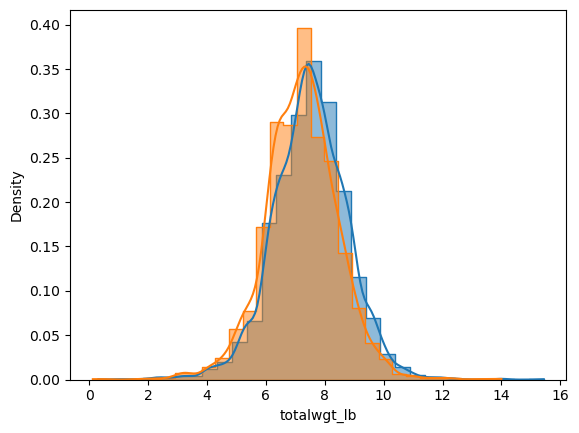

In [517]:
#using hues is bad because it doesnt takein effect if both are disproportionate
#using stat = "density" gives you normal distribution of normalized values
sns.histplot(data=rofl, x= rofl["totalwgt_lb"][rofl["babysex"]==1], element="step", palette=sns.color_palette("pastel"), bins =30, kde=True, stat = "density", discrete = False )
sns.histplot(data=rofl, x= rofl["totalwgt_lb"][rofl["babysex"]==2], element="step", palette=sns.color_palette("pastel"), bins =30, kde=True, stat = "density", discrete = False )


c:\python\thinkstats\solutions\thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())
c:\python\thinkstats\solutions\thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


{'xscale': 'linear', 'yscale': 'linear'}

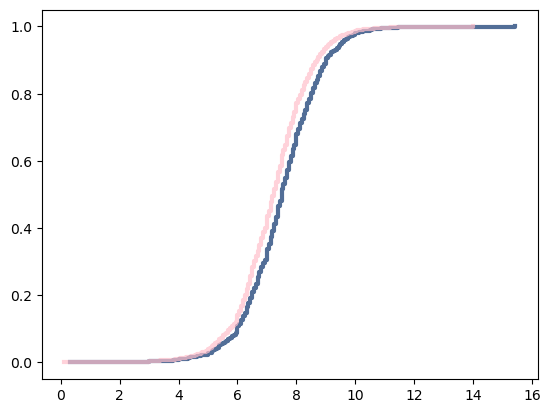

In [ ]:
male=join[join["babysex"]==1]["totalwgt_lb"]
female=join[join["babysex"]==2]["totalwgt_lb"]
cdfmal=thinkstats2.Cdf(male)
cdffemale=thinkstats2.Cdf(female)
thinkplot.Cdf(cdfmal)
thinkplot.Cdf(cdffemale, color="pink")

In [ ]:
print(join[join["babysex"]==1]["totalwgt_lb"].mean()-join[join["babysex"]==2]["totalwgt_lb"].mean())
print()

0.29288860982249787



c:\python\thinkstats\solutions\thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())
c:\python\thinkstats\solutions\thinkstats2.py:162: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


{'xscale': 'linear', 'yscale': 'linear'}

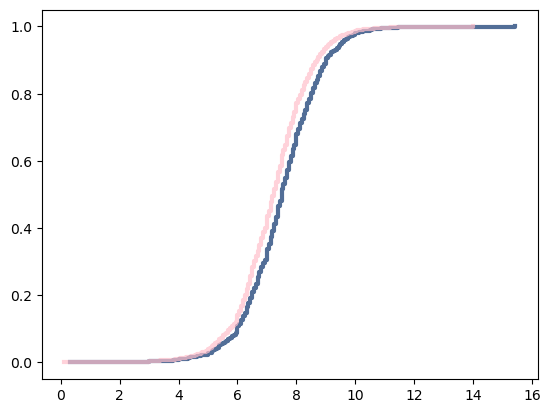

In [ ]:
male=rofl[rofl["babysex"]==1]["totalwgt_lb"]
female=rofl[rofl["babysex"]==2]["totalwgt_lb"]
cdfmal=thinkstats2.Cdf(male)
cdffemale=thinkstats2.Cdf(female)
thinkplot.Cdf(cdfmal)
thinkplot.Cdf(cdffemale, color="pink")

<AxesSubplot: >

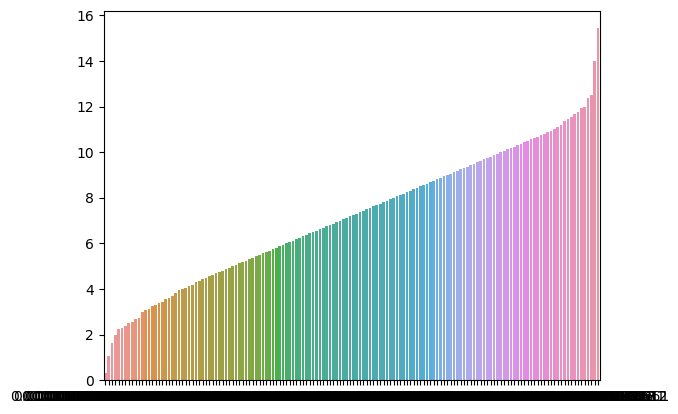

In [ ]:
sns.barplot(y=cdfmal.xs,x=cdfmal.ps)

The following functions report the variables with the highest values of $R^2$.

In [ ]:
import re

def ReadVariables():
    """Reads Stata dictionary files for NSFG data.

    returns: DataFrame that maps variables names to descriptions
    """
    vars1 = thinkstats2.ReadStataDct('2002FemPreg.dct').variables
    vars2 = thinkstats2.ReadStataDct('2002FemResp.dct').variables

    all_vars = vars1.append(vars2)
    all_vars.index = all_vars.name
    return all_vars

def MiningReport(variables, n=30):
    """Prints variables with the highest R^2.

    t: list of (R^2, variable name) pairs
    n: number of pairs to print
    """
    all_vars = ReadVariables()

    variables.sort(reverse=True)
    for r2, name in variables[:n]:
        key = re.sub('_r$', '', name)
        try:
            desc = all_vars.loc[key].desc
            if isinstance(desc, pd.Series):
                desc = desc[0]
            print(name, r2, desc)
        except (KeyError, IndexError):
            print(name, r2)

AttributeError: 'FixedWidthVariables' object has no attribute 'values'

Some of the variables that do well are not useful for prediction because they are not known ahead of time.

In [ ]:
MiningReport(variables)


totalwgt_lb 1.0
birthwgt_lb 0.9498127305978009 BD-3 BIRTHWEIGHT IN POUNDS - 1ST BABY FROM THIS PREGNANCY
lbw1 0.3008240784470769 LOW BIRTHWEIGHT - BABY 1
prglngth 0.13012519488625063 DURATION OF COMPLETED PREGNANCY IN WEEKS
wksgest 0.12340041363361054 GESTATIONAL LENGTH OF COMPLETED PREGNANCY (IN WEEKS)
agecon 0.10203149928156052 AGE AT TIME OF CONCEPTION
mosgest 0.027144274639579802 GESTATIONAL LENGTH OF COMPLETED PREGNANCY (IN MONTHS)
babysex 0.01855092529394209 BD-2 SEX OF 1ST LIVEBORN BABY FROM THIS PREGNANCY
race_r 0.016199503586253106 RACE
race 0.016199503586253106 RACE
nbrnaliv 0.016017752709788113 BC-2 NUMBER OF BABIES BORN ALIVE FROM THIS PREGNANCY
paydu 0.014003795578114597 IB-10 CURRENT LIVING QUARTERS OWNED/RENTED, ETC
rmarout03 0.013430066465713209 INFORMAL MARITAL STATUS WHEN PREGNANCY ENDED - 3RD
birthwgt_oz 0.013102457615706165 BD-3 BIRTHWEIGHT IN OUNCES - 1ST BABY FROM THIS PREGNANCY
anynurse 0.012529022541810764 BH-1 WHETHER R BREASTFED THIS CHILD AT ALL - 1ST FROM TH

C:\Users\rik\AppData\Local\Temp\ipykernel_6024\4248865890.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_vars = vars1.append(vars2)


Combining the variables that seem to have the most explanatory power.

In [ ]:
formula = ('totalwgt_lb ~ agepreg + C(race) + babysex==1 + '
               'nbrnaliv>1 + paydu==1 + totincr')
results = smf.ols(formula, data=join).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     79.98
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          4.86e-113
Time:                        15:41:09   Log-Likelihood:                -14295.
No. Observations:                8781   AIC:                         2.861e+04
Df Residuals:                    8773   BIC:                         2.866e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.6303      0.065    102.223      0.000       6.503       6.757
C(race)[T.2]             0.3570      0.032     11.215      0.000       0.295       0.419
C(race)[T.3]             0.2665      0.051      5.175      0.000       0.166       0.367
babysex == 1[T.True]     0.2952      0.026     11.216      0.000       0.244       0.347
nbrnaliv > 1[T.True]    -1.3783      0.108    -12.771      0.000      -1.590      -1.167
paydu == 1[T.True]       0.1196      0.031      3.861      0.000       0.059       0.180
agepreg                  0.0074      0.003      2.921      0.004       0.002       0.012
totincr                  0.0122      0.004      3.110      0.002       0.005       0.020
==============================================================================
Omnibus:                      398.813   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1388.362
Skew:                          -0.037   Prob(JB):                    3.32e-302
Kurtosis:                       4.947   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic regression

Example: suppose we are trying to predict `y` using explanatory variables `x1` and `x2`.

In [ ]:
y = np.array([0, 1, 0, 1])
x1 = np.array([0, 0, 0, 1])
x2 = np.array([0, 1, 1, 1])

According to the logit model the log odds for the $i$th element of $y$ is

$\log o = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $

So let's start with an arbitrary guess about the elements of $\beta$:



In [ ]:
beta = [-1.5, 2.8, 1.1]

Plugging in the model, we get log odds.

In [ ]:
log_o = beta[0] + beta[1] * x1 + beta[2] * x2
log_o

array([-1.5, -0.4, -0.4,  2.4])

Which we can convert to odds.

In [ ]:
o = np.exp(log_o)
o

array([ 0.22313016,  0.67032005,  0.67032005, 11.02317638])

And then convert to probabilities.

In [ ]:
p = o / (o+1)
p

array([0.18242552, 0.40131234, 0.40131234, 0.9168273 ])

The likelihoods of the actual outcomes are $p$ where $y$ is 1 and $1-p$ where $y$ is 0. 

In [ ]:
likes = np.where(y, p, 1-p)
likes

array([0.81757448, 0.40131234, 0.59868766, 0.9168273 ])

The likelihood of $y$ given $\beta$ is the product of `likes`:

In [ ]:
like = np.prod(likes)
like

0.1800933529673034

Logistic regression works by searching for the values in $\beta$ that maximize `like`.

Here's an example using variables in the NSFG respondent file to predict whether a baby will be a boy or a girl.

In [518]:
import first
live, firsts, others = first.MakeFrames()
live = live[live.prglngth>30]
live['boy'] = (live.babysex==1).astype(int)

The mother's age seems to have a small effect.

In [519]:
model = smf.logit('boy ~ agepreg', data=live)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8884
Model:                          Logit   Df Residuals:                     8882
Method:                           MLE   Df Model:                            1
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:               6.144e-06
Time:                        20:22:31   Log-Likelihood:                -6156.7
converged:                       True   LL-Null:                       -6156.8
Covariance Type:            nonrobust   LLR p-value:                    0.7833
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0058      0.098      0.059      0.953      -0.185       0.197
agepreg        0.0010      0.004      0.275      0.783      -0.006       0.009
==============================================================================
"""

Here are the variables that seemed most promising.

In [520]:
formula = 'boy ~ agepreg + hpagelb + birthord + C(race)'
model = smf.logit(formula, data=live)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.692944
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8782
Model:                          Logit   Df Residuals:                     8776
Method:                           MLE   Df Model:                            5
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:               0.0001440
Time:                        20:22:34   Log-Likelihood:                -6085.4
converged:                       True   LL-Null:                       -6086.3
Covariance Type:            nonrobust   LLR p-value:                    0.8822
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0301      0.104     -0.290      0.772      -0.234       0.173
C(race)[T.2]    -0.0224      0.051     -0.439      0.660      -0.122       0.077
C(race)[T.3]    -0.0005      0.083     -0.005      0.996      -0.163       0.162
agepreg         -0.0027      0.006     -0.484      0.629      -0.014       0.008
hpagelb          0.0047      0.004      1.112      0.266      -0.004       0.013
birthord         0.0050      0.022      0.227      0.821      -0.038       0.048
================================================================================
"""

To make a prediction, we have to extract the exogenous and endogenous variables.

In [521]:
endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)
print(endog)
print(exog)

      boy
0     1.0
1     0.0
2     1.0
3     0.0
4     0.0
...   ...
8777  1.0
8778  0.0
8779  1.0
8780  1.0
8781  1.0

[8782 rows x 1 columns]
      Intercept  C(race)[T.2]  C(race)[T.3]  agepreg  hpagelb  birthord
0           1.0           1.0           0.0    33.16     37.0       1.0
1           1.0           1.0           0.0    39.25     42.0       2.0
2           1.0           0.0           0.0    14.33     24.0       1.0
3           1.0           0.0           0.0    17.83     25.0       2.0
4           1.0           0.0           0.0    18.33     25.0       3.0
...         ...           ...           ...      ...      ...       ...
8777        1.0           0.0           1.0    30.66     34.0       1.0
8778        1.0           1.0           0.0    26.91     30.0       1.0
8779        1.0           1.0           0.0    17.91     19.0       1.0
8780        1.0           1.0           0.0    21.58     24.0       2.0
8781        1.0           1.0           0.0    21.58     24.0  

The baseline prediction strategy is to guess "boy".  In that case, we're right almost 51% of the time.

In [522]:
actual = endog['boy']
baseline = actual.mean()
baseline

0.507173764518333

In [550]:
print((results.predict() <=0.5 ).astype("int").sum())

print(((results.predict()<=0.5)*actual).sum())
#1058-510=548, see below

1058
510.0


If we use the previous model, we can compute the number of predictions we get right.

In [80]:
#actual predicts boys. 1= boy -> True*1 = 1 -> False*1=0
#Other way around wouldnt work without changing actual to the opposite

predict = (results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)

(3944.0, 548.0)

And the accuracy, which is slightly higher than the baseline.

In [81]:
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.5115007970849464

To make a prediction for an individual, we have to get their information into a `DataFrame`.

In [82]:
columns = ['agepreg', 'hpagelb', 'birthord', 'race']
new = pd.DataFrame([[35, 39, 3, 2]], columns=columns)
y = results.predict(new)
y

0    0.513091
dtype: float64

This person has a 51% chance of having a boy (according to the model).

## Exercises

**Exercise:** Suppose one of your co-workers is expecting a baby and you are participating in an office pool to predict the date of birth. Assuming that bets are placed during the 30th week of pregnancy, what variables could you use to make the best prediction? You should limit yourself to variables that are known before the birth, and likely to be available to the people in the pool.

In [83]:
import first
live, firsts, others = first.MakeFrames()
live = live[live.prglngth>30]

In [84]:
# Solution

# The following are the only variables I found that have a statistically significant effect on pregnancy length.

import statsmodels.formula.api as smf
model = smf.ols('prglngth ~ birthord==1 + race==2 + nbrnaliv>1', data=live)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prglngth   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     34.28
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           5.09e-22
Time:                        15:41:21   Log-Likelihood:                -18247.
No. Observations:                8884   AIC:                         3.650e+04
Df Residuals:                    8880   BIC:                         3.653e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                38.7617      0.039   1006.410      0.000      38.686      38.837
birthord == 1[T.True]     0.1015      0.040      2.528      0.011       0.023       0.180
race == 2[T.True]         0.1390      0.042      3.311      0.001       0.057       0.221
nbrnaliv > 1[T.True]     -1.4944      0.164     -9.086      0.000      -1.817      -1.172
==============================================================================
Omnibus:                     1587.470   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6160.751
Skew:                          -0.852   Prob(JB):                         0.00
Kurtosis:                       6.707   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Exercise:** The Trivers-Willard hypothesis suggests that for many mammals the sex ratio depends on “maternal condition”; that is, factors like the mother’s age, size, health, and social status. See https://en.wikipedia.org/wiki/Trivers-Willard_hypothesis

Some studies have shown this effect among humans, but results are mixed. In this chapter we tested some variables related to these factors, but didn’t find any with a statistically significant effect on sex ratio.

As an exercise, use a data mining approach to test the other variables in the pregnancy and respondent files. Can you find any factors with a substantial effect?

In [85]:
# Solution

def GoMining(df):
    """Searches for variables that predict birth weight.

    df: DataFrame of pregnancy records

    returns: list of (rsquared, variable name) pairs
    """
    df['boy'] = (df.babysex==1).astype(int)
    variables = []
    for name in df.columns:
        try:
            if df[name].var() < 1e-7:
                continue

            formula='boy ~ agepreg + ' + name
            model = smf.logit(formula, data=df)
            nobs = len(model.endog)
            if nobs < len(df)/2:
                continue

            results = model.fit()
        except:
            continue

        variables.append((results.prsquared, name))

    return variables

variables = GoMining(join)

C:\Users\rik\AppData\Local\Temp\ipykernel_6024\1682178745.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['boy'] = (df.babysex==1).astype(int)


Optimization terminated successfully.
         Current function value: 0.692991
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692961
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692849
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692996
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692903
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692724
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.693014
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692992
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693010
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692985
  

c:\Users\rik\.conda\envs\datascience\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.692985
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692971
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693003
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692998
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692973
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692973
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692810
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693014
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693015
  

c:\Users\rik\.conda\envs\datascience\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.692726
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692774
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692999
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692861
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692705
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692723
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692803
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692956
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692786
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693007
  

c:\Users\rik\.conda\envs\datascience\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693011
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693010
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692658
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692789
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693008
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692855
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692855
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693013
  

c:\Users\rik\.conda\envs\datascience\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.692995
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693001
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693014
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692957
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692983
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692258
         Iterations 5
         Current function value: 0.692696
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.692993
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693009
         Iterations 3


c:\Users\rik\.conda\envs\datascience\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.693011
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692853
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692971
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692639
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692917
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692760
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693013
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692832
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693028
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693014
  

c:\Users\rik\.conda\envs\datascience\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.692831
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692999
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693003
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692997
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692795
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692693
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692457
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692815
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693002
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693011
  

In [86]:
# Solution

#Here are the 30 variables that yield the highest pseudo-R^2 values.

MiningReport(variables)

totalwgt_lb 0.009696855253233383
birthwgt_lb 0.009274460080281988 BD-3 BIRTHWEIGHT IN POUNDS - 1ST BABY FROM THIS PREGNANCY
constat3 0.0010985419170438382 3RD PRIORITY CODE FOR CURRENT CONTRACEPTIVE STATUS
lbw1 0.0010519527860076705 LOW BIRTHWEIGHT - BABY 1
nplaced 0.001010368752280555 # OF R'S BIO CHILDREN SHE PLACED FOR ADOPTION (BASED ON BPA)
fmarout5 0.0009096579032891183 FORMAL MARITAL STATUS AT PREGNANCY OUTCOME
rmarout6 0.000818252143711895 INFORMAL MARITAL STATUS AT PREGNANCY OUTCOME - 6 CATEGORIES
infever 0.0008115919859909004 EVER USED INFERTILITY SERVICES OF ANY KIND
frsteatd 0.0007675331422082321 AGE (IN MOS) WHEN 1ST SUPPLEMENTED - 1ST FROM THIS PREG
splstwk1 0.0007334122339932581 IF-1 H/P DOING WHAT LAST WEEK (EMPLOYMENT STATUS) 1ST MENTION
pmarpreg 0.0007245809157658822 WHETHER PREGNANCY ENDED BEFORE R'S 1ST MARRIAGE (PREMARITALLY)
usefstp 0.0007122387685902787 EF-3 USE METHOD AT FIRST SEX WITH 1ST PARTNER IN PAST 12 MONTHS?
outcom02 0.0007015744602576479 OUTCOME OF PREG

C:\Users\rik\AppData\Local\Temp\ipykernel_6024\4248865890.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_vars = vars1.append(vars2)


In [87]:
# Solution

# Eliminating variables that are not known during pregnancy and 
# others that are fishy for various reasons, here's the best model I could find:

formula = 'boy ~ agepreg + fmarout5==5 + infever==1'
model = smf.logit(formula, data=join)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 0.691874
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8884
Model:                          Logit   Df Residuals:                     8880
Method:                           MLE   Df Model:                            3
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:                0.001653
Time:                        15:42:21   Log-Likelihood:                -6146.6
converged:                       True   LL-Null:                       -6156.8
Covariance Type:            nonrobust   LLR p-value:                 0.0001432
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.1805      0.118     -1.534      0.125      -0.411       0.050
fmarout5 == 5[T.True]     0.1582      0.049      3.217      0.001       0.062       0.255
infever == 1[T.True]      0.2194      0.065      3.374      0.001       0.092       0.347
agepreg                   0.0050      0.004      1.172      0.241      -0.003       0.013
=========================================================================================
"""

**Exercise:** If the quantity you want to predict is a count, you can use Poisson regression, which is implemented in StatsModels with a function called `poisson`. It works the same way as `ols` and `logit`. As an exercise, let’s use it to predict how many children a woman has born; in the NSFG dataset, this variable is called `numbabes`.

Suppose you meet a woman who is 35 years old, black, and a college graduate whose annual household income exceeds $75,000. How many children would you predict she has born?

In [88]:
# Solution

# I used a nonlinear model of age.

join.numbabes.replace([97], np.nan, inplace=True)
join['age2'] = join.age_r**2

C:\Users\rik\AppData\Local\Temp\ipykernel_6024\1720221044.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  join['age2'] = join.age_r**2


In [89]:
# Solution

formula = 'numbabes ~ age_r + age2 + age3 + C(race) + totincr + educat'
formula = 'numbabes ~ age_r + age2 + C(race) + totincr + educat'
model = smf.poisson(formula, data=join)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 1.677002
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numbabes   No. Observations:                 8884
Model:                        Poisson   Df Residuals:                     8877
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:                 0.03686
Time:                        15:42:22   Log-Likelihood:                -14898.
converged:                       True   LL-Null:                       -15469.
Covariance Type:            nonrobust   LLR p-value:                3.681e-243
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0324      0.169     -6.098      0.000      -1.364      -0.701
C(race)[T.2]    -0.1401      0.015     -9.479      0.000      -0.169      -0.111
C(race)[T.3]    -0.0991      0.025     -4.029      0.000      -0.147      -0.051
age_r            0.1556      0.010     15.006      0.000       0.135       0.176
age2            -0.0020      0.000    -13.102      0.000      -0.002      -0.002
totincr         -0.0187      0.002     -9.830      0.000      -0.022      -0.015
educat          -0.0471      0.003    -16.076      0.000      -0.053      -0.041
================================================================================
"""

Now we can predict the number of children for a woman who is 35 years old, black, and a college
graduate whose annual household income exceeds $75,000

In [90]:
# Solution

columns = ['age_r', 'age2', 'age3', 'race', 'totincr', 'educat']
new = pd.DataFrame([[35, 35**2, 35**3, 1, 14, 16]], columns=columns)
results.predict(new)

0    2.496802
dtype: float64

**Exercise:** If the quantity you want to predict is categorical, you can use multinomial logistic regression, which is implemented in StatsModels with a function called `mnlogit`. As an exercise, let’s use it to guess whether a woman is married, cohabitating, widowed, divorced, separated, or never married; in the NSFG dataset, marital status is encoded in a variable called `rmarital`.

Suppose you meet a woman who is 25 years old, white, and a high school graduate whose annual household income is about $45,000. What is the probability that she is married, cohabitating, etc?

In [91]:
# Solution

# Here's the best model I could find.

formula='rmarital ~ age_r + age2 + C(race) + totincr + educat'
model = smf.mnlogit(formula, data=join)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 1.084053
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:               rmarital   No. Observations:                 8884
Model:                        MNLogit   Df Residuals:                     8849
Method:                           MLE   Df Model:                           30
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:                  0.1682
Time:                        15:42:24   Log-Likelihood:                -9630.7
converged:                       True   LL-Null:                       -11579.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
  rmarital=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.0156      0.805     11.199      0.000       7.438      10.593
C(race)[T.2]    -0.9237      0.089    -10.418      0.000      -1.097      -0.750
C(race)[T.3]    -0.6179      0.136     -4.536      0.000      -0.885      -0.351
age_r           -0.3635      0.051     -7.150      0.000      -0.463      -0.264
age2             0.0048      0.001      6.103      0.000       0.003       0.006
totincr         -0.1310      0.012    -11.337      0.000      -0.154      -0.108
educat          -0.1953      0.019    -10.424      0.000      -0.232      -0.159
--------------------------------------------------------------------------------
  rmarital=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9570      3.020      0.979      0.328      -2.963       8.877
C(race)[T.2]    -0.4411      0.237     -1.863      0.062      -0.905       0.023
C(race)[T.3]     0.0591      0.336      0.176      0.860      -0.600       0.718
age_r           -0.3177      0.177     -1.798      0.072      -0.664       0.029
age2             0.0064      0.003      2.528      0.011       0.001       0.011
totincr         -0.3258      0.032    -10.175      0.000      -0.389      -0.263
educat          -0.0991      0.048     -2.050      0.040      -0.194      -0.004
--------------------------------------------------------------------------------
  rmarital=4       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.5238      1.205     -2.924      0.003      -5.886      -1.162
C(race)[T.2]    -0.3213      0.093     -3.445      0.001      -0.504      -0.139
C(race)[T.3]    -0.7706      0.171     -4.509      0.000      -1.106      -0.436
age_r            0.1155      0.071      1.626      0.104      -0.024       0.255
age2            -0.0007      0.001     -0.701      0.483      -0.003       0.001
totincr         -0.2276      0.012    -19.621      0.000      -0.250      -0.205
educat           0.0667      0.017      3.995      0.000       0.034       0.099
--------------------------------------------------------------------------------
  rmarital=5       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.8963      1.305     -2.220      0.026      -5.453      -0.339
C(race)[T.2]    -1.0407      0.104    -10.038      0.000      -1.244      -0.837
C(race)[T.3]    -0.5661      0.156     -3.635      0.000      -0.871      -0.261
age_r            0.2411      0.079      3.038      0.002       0.086       0.397
age2            -0.0035      0.001     -2.977      0.003      -0.006      -0.001
totincr         -0.2932      0.015    -20.159      0.000      -0.322      -0.265
educat          -0.0174      0.021     -0.813      0.416      -0.059       0.025
-

Make a prediction for a woman who is 25 years old, white, and a high
school graduate whose annual household income is about $45,000.

In [92]:
# Solution

# This person has a 75% chance of being currently married, 
# a 13% chance of being "not married but living with opposite 
# sex partner", etc.

columns = ['age_r', 'age2', 'race', 'totincr', 'educat']
new = pd.DataFrame([[25, 25**2, 2, 11, 12]], columns=columns)
results.predict(new)

,0,1,2,3,4,5
0,0.750028,0.126397,0.001564,0.033403,0.021485,0.067122
